The Nobel Prize has been among the most prestigious international awards since 1901. Each year, awards are bestowed in chemistry, literature, physics, physiology or medicine, economics, and peace. In addition to the honor, prestige, and substantial prize money, the recipient also gets a gold medal with an image of Alfred Nobel (1833 - 1896), who established the prize.

![](Nobel_Prize.png)

The Nobel Foundation has made a dataset available of all prize winners from the outset of the awards from 1901 to 2023. The dataset used in this project is from the Nobel Prize API and is available in the `nobel.csv` file in the `data` folder.

In this project, you'll get a chance to explore and answer several questions related to this prizewinning data. And we encourage you then to explore further questions that you're interested in!

Most commonly awarded country is: United States of America
Most commonly awarded gender is: Male

The decade with highest proportion of US-born winners is 2000.

The decade and Nobel Prize category combination with highest proportion of female laureates are:
    decade    category
68    2020  Literature

The first woman to receive a Nobel Price is Marie Curie, née Sklodowska in Physics in the year 1903.

Winners to get more than one prize are: ['Comité international de la Croix Rouge (International Committee of the Red Cross)', 'Linus Carl Pauling', 'John Bardeen', 'Frederick Sanger', 'Marie Curie, née Sklodowska', 'Office of the United Nations High Commissioner for Refugees (UNHCR)']


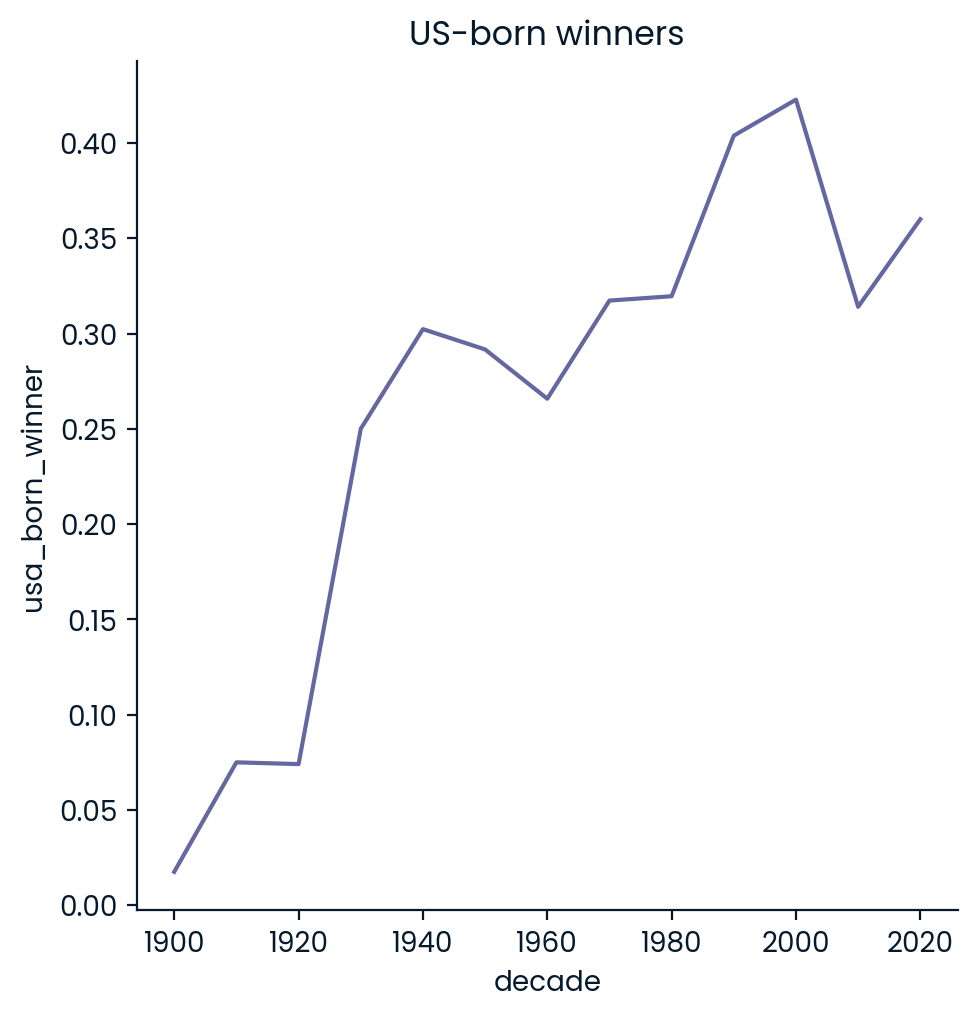

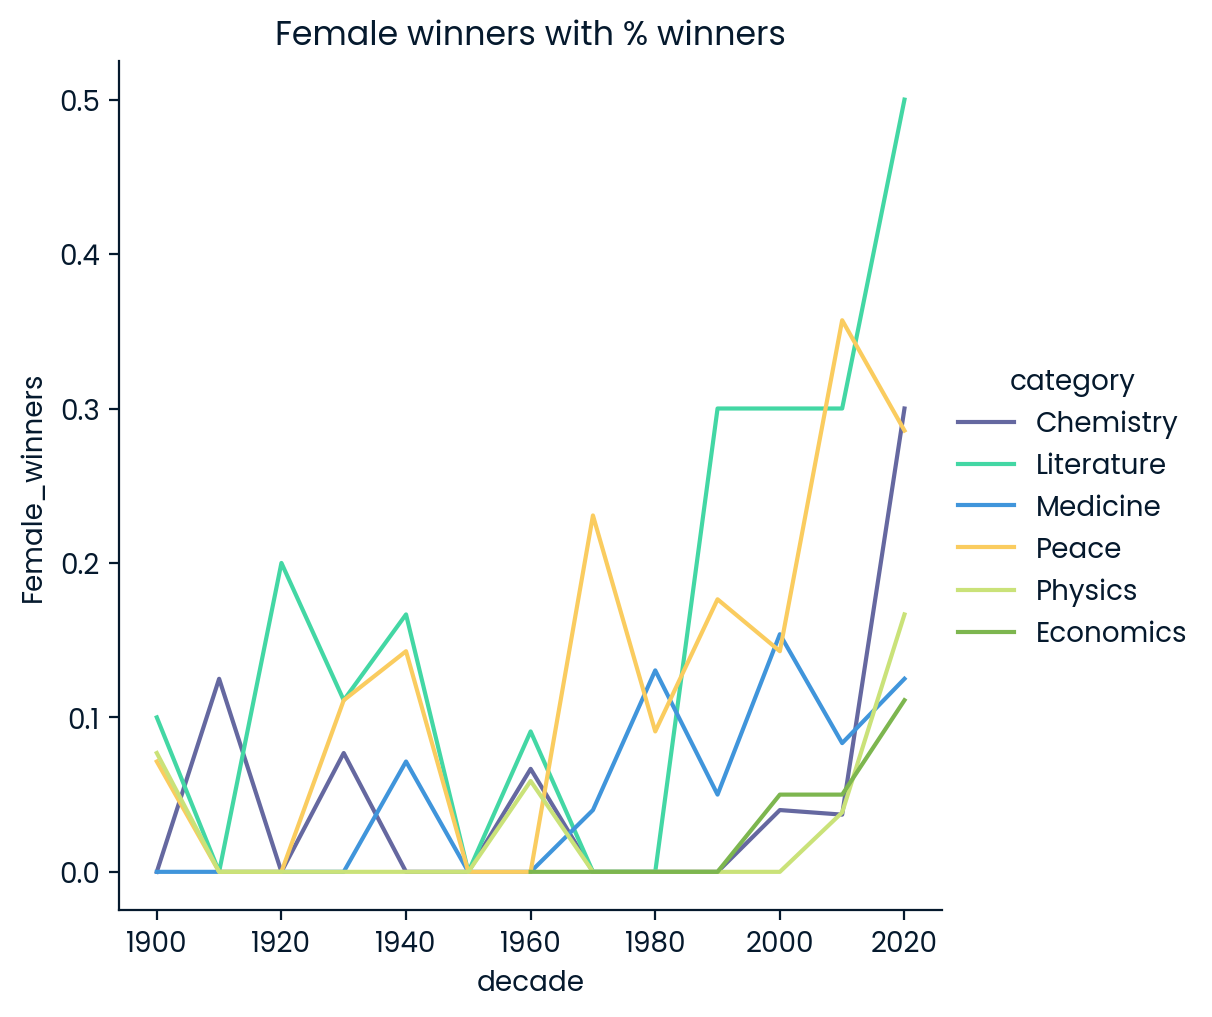

In [46]:
# Loading in required libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt  

# Start coding here!

nobel = pd.read_csv("data/nobel.csv")
nobel.head()

# What is the most commonly awarded gender and birth country?
top_country = nobel["birth_country"].value_counts().index[0]
print("Most commonly awarded country is:", top_country)
top_gender = nobel["sex"].value_counts().index[0]
print("Most commonly awarded gender is:", top_gender)

# Which decade had the highest ratio of US-born Nobel Prize winners to total winners in all categories?
# Calculate the proportion of USA born winners per decade
nobel['usa_born_winner'] = nobel['birth_country'] == 'United States of America'
nobel['decade'] = (np.floor(nobel['year'] / 10) * 10).astype(int)
prop_usa_winners = nobel.groupby('decade', as_index=False)['usa_born_winner'].mean()

# Identify the decade with the highest proportion of US-born winners
max_decade_usa = prop_usa_winners[prop_usa_winners['usa_born_winner'] == prop_usa_winners['usa_born_winner'].max()]['decade'].values[0]
print(f"\nThe decade with highest proportion of US-born winners is {max_decade_usa}.")

# Optional: Plotting USA born winners
ax1 = sns.relplot(x='decade', y='usa_born_winner', data=prop_usa_winners, kind="line")
plt.title("US-born winners")


# Which decade and Nobel Prize category combination had the highest proportion of female laureates?
nobel["Female_winners"] = nobel["sex"] == "Female"
Female_Winner_decade = nobel.groupby(["decade","category"], as_index=False)["Female_winners"].mean()
max_female_decade_category = Female_Winner_decade[Female_Winner_decade['Female_winners'] == Female_Winner_decade['Female_winners'].max()][['decade', 'category']]
print("\nThe decade and Nobel Prize category combination with highest proportion of female laureates are:")
print(max_female_decade_category)

# Create a dictionary with the decade and category pair
max_female_dict = {max_female_decade_category['decade'].values[0]: max_female_decade_category['category'].values[0]}

# Plotting female winners with % winners on the y-axis
ax2 = sns.relplot(x='decade', y='Female_winners', hue='category', data=Female_Winner_decade, kind="line")
plt.title("Female winners with % winners")

# Who was the first woman to receive a Nobel Prize, and in what category?
women_winners = nobel[nobel['Female_winners']]
min_row = women_winners[women_winners['year'] == women_winners['year'].min()]
first_woman_name = min_row['full_name'].values[0]
first_woman_category = min_row['category'].values[0]
first_woman_year = min_row['year'].values[0]
print(f"\nThe first woman to receive a Nobel Price is {first_woman_name} in {first_woman_category} in the year {first_woman_year}.")

# Which individuals or organizations have won more than one Nobel Prize throughout the years?
winners_list = nobel["full_name"].value_counts()
repeats = winners_list[winners_list >=2].index
repeat_list = list(repeats)
print("\nWinners to get more than one prize are:", repeat_list)
